<a href="https://colab.research.google.com/github/Hamidk2398/Bengkel-Barokah/blob/main/Dataset%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 6 - Organisasi dan Analisis Dataset

## Capaian Pembelajaran:
> 2.3: Mampu mengorganisasikan dataset dari berbagai sumber menggunakan teknik seperti feature engineering, data augmentation, normalisasi, dan ensemble methods untuk menghasilkan insight berharga bagi model.

> 3.1: Mampu menganalisis dataset untuk mengidentifikasi pola dan tren yang signifikan serta melakukan exploratory data analysis untuk mendapatkan wawasan awal tentang data.

## Pokok Bahasan
1. Feature Engineering: definisi, teknik, dan implementasi
2. Data Augmentation: konsep, tujuan, teknik (gambar dan teks), dan implementasi menggunakan imgaug atau TextBlob.
3. Normalisasi Data: fungsi, teknik-teknik (min-max scaling, z-score normalization), dan implementasi menggunakan scikit-learn.
4. Ensemble Methods: konsep, jenis, implementasi, keunggulan dan aplikasi untuk meningkatkan kinerja.
5. Identifikasi pola dan tren


## 1. Feature Engineering: definisi, teknik, dan implementasi
Feature engineering adalah proses di mana kita menggunakan pengetahuan domain untuk membuat fitur-fitur baru yang lebih informatif dari data mentah (raw data) yang ada. Tujuannya adalah untuk meningkatkan kualitas data yang digunakan dalam model machine learning, sehingga model dapat membuat prediksi yang lebih akurat.

##### Teknik Feature Engineering:
1. Penggabungan Fitur (Feature Combination): Menggabungkan beberapa fitur untuk menciptakan fitur baru yang lebih informatif. Contohnya, dalam data geospasial, bisa digabungkan koordinat latitude dan longitude menjadi fitur jarak atau fitur lain yang lebih bermakna.
2. Pengurangan Dimensi (Dimensionality Reduction): Mengurangi jumlah fitur dalam dataset dengan teknik seperti Principal Component Analysis (PCA) atau t-SNE untuk menghilangkan fitur yang kurang relevan atau redundan.
3. Penambahan Informasi (Feature Augmentation): Menambahkan informasi tambahan ke dalam dataset, misalnya menambahkan fitur tanggal menjadi hari kerja atau hari libur, yang dapat memberikan wawasan tambahan pada model.
4. Transformasi Fitur (Feature Transformation): Mengubah skala atau distribusi dari fitur untuk memperbaiki kinerja model. Contoh umumnya adalah normalisasi atau transformasi logaritmik.
5. Seleksi Fitur (Feature Selection): Memilih subset fitur yang paling penting atau relevan untuk meningkatkan performa model. Teknik seperti chi-square, information gain, atau recursive feature elimination (RFE) digunakan untuk seleksi fitur.
6. Encoding Kategori (Category Encoding): Mengubah variabel kategori menjadi bentuk yang dapat dimengerti oleh model, seperti menggunakan teknik one-hot encoding atau label encoding.

In [ ]:
# Implementasi:
# Berikut adalah contoh implementasi sederhana beberapa teknik feature engineering menggunakan Python dan scikit-learn:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Contoh dataset
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Boston', 'Miami'],
    'Temperature': [25, 30, 22, 18, 28],
    'Category': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Contoh 1: Encoding kategori
encoder = OneHotEncoder()
encoded_category = encoder.fit_transform(df[['Category']])

# Contoh 2: Transformasi fitur numerik
scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(df[['Temperature']])

# Contoh 3: Penggabungan fitur
df['City_Temperature'] = df['City'] + '_' + df['Temperature'].astype(str)

# Contoh 4: Pengurangan dimensi dengan PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(encoded_category.toarray())

# Contoh 5: Ekstraksi fitur teks dengan TF-IDF
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Memisahkan fitur dan label, dan membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, df[['Category']], test_size=0.2, random_state=42)

# Contoh menggunakan model machine learning setelah feature engineering
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Dalam contoh di atas:
- Kita mulai dengan dataset sederhana yang berisi fitur kategori, numerik, dan teks.
- Dilakukan encoding kategori menggunakan OneHotEncoder, transformasi skala fitur numerik menggunakan StandardScaler, penggabungan fitur dengan menambahkan fitur baru City_Temperature, dan pengurangan dimensi dengan menggunakan PCA.
- Fitur teks diekstraksi menggunakan TfidfVectorizer.
- Setelah melakukan feature engineering, dataset dibagi menjadi data pelatihan dan data pengujian, dan digunakan model RandomForestClassifier untuk memprediksi kategori dari contoh data pengujian.
- Akurasi dari model diukur menggunakan metrik accuracy.

Feature engineering adalah langkah penting dalam pengembangan model machine learning yang dapat meningkatkan performa model dengan memanfaatkan informasi tambahan atau lebih relevan dari dataset yang tersedia.

## 2. Data Augmentation
Data augmentation adalah teknik yang digunakan untuk meningkatkan variasi dataset dengan membuat salinan data yang dimodifikasi dari data asli. Tujuan utamanya adalah untuk memperluas dataset yang tersedia tanpa mengumpulkan lebih banyak data, yang dapat membantu mengurangi overfitting dan meningkatkan generalisasi model.

#### Tujuan Data Augmentation
1. Meningkatkan Keanekaragaman Data: Dengan membuat variasi data yang lebih besar, model dapat mempelajari pola yang lebih umum dan lebih baik dalam data yang belum pernah dilihat sebelumnya.
2. Mengurangi Overfitting: Dengan menggunakan augmentasi, kita dapat mengurangi risiko model mempelajari detail yang spesifik dari data pelatihan yang mungkin tidak relevan untuk data baru.
3. Memperbaiki Kinerja Model: Dengan dataset yang lebih besar dan lebih bervariasi, kita dapat meningkatkan performa model dalam tugas-tugas seperti klasifikasi gambar atau teks.

#### Teknik Data Augmentation
##### Data Augmentation Gambar
- Rotasi: Memutar gambar dalam berbagai sudut.
- Flip: Membalikkan gambar secara horizontal atau vertikal.
- Zoom: Memperbesar atau memperkecil bagian-bagian gambar.
- Pergeseran: Memindahkan gambar ke arah horizontal atau vertikal.
- Cropping: Memotong bagian dari gambar.

##### Implementasi menggunakan imgaug (Python):
imgaug adalah pustaka Python yang kuat untuk augmentasi gambar dengan berbagai teknik. Berikut adalah contoh penggunaan imgaug untuk melakukan beberapa teknik augmentasi gambar:

In [ ]:
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

# Contoh gambar
image = np.array(Image.open('example_image.jpg'))

# Definisi augmentor
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal dengan peluang 50%
    iaa.Affine(rotate=(-10, 10)),  # Rotasi gambar dalam rentang -10 sampai 10 derajat
    iaa.GaussianBlur(sigma=(0, 1.0))  # Blur Gaussian dengan sigma antara 0 dan 1.0
])

# Augmentasi gambar
augmented_image = seq(image=image)

# Tampilkan hasil augmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Gambar Setelah Augmentasi')

plt.tight_layout()
plt.show()


In [ ]:
!pip install "numpy<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install imgaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


##### Data Augmentation Teks
- Pertambahan Kata (Word Insertion): Menambahkan kata-kata baru ke dalam teks.
- Penggantian Kata (Word Replacement): Mengganti kata-kata dengan sinonim atau kata-kata yang serupa.
- Pemotongan Kata (Word Truncation): Memotong atau menghapus kata-kata dari teks.
- Pengacakan Urutan Kata (Word Reordering): Mengacak urutan kata dalam teks.

#### Implementasi menggunakan TextBlob (Python):
TextBlob adalah pustaka Python yang memudahkan analisis teks dengan menyediakan akses mudah ke operasi linguistik. Berikut adalah contoh penggunaan TextBlob untuk beberapa teknik augmentasi teks:

In [ ]:
from textblob import TextBlob
import random
import nltk

nltk.download('punkt_tab')

# Contoh teks
text = "Ini adalah contoh kalimat untuk augmentasi teks."

# Objek TextBlob untuk teks
blob = TextBlob(text)

# Pertambahan kata
augmented_text = blob.words + ['baru', 'kata']

# Penggantian kata acak
for i in range(len(blob.words)):
    if random.random() < 0.3:  # Probabilitas 30% untuk penggantian kata
        augmented_text[i] = 'kata_baru'

# Konversi kembali ke teks
augmented_text = ' '.join(augmented_text)

print("Teks Asli:", text)
print("Teks Setelah Augmentasi:", augmented_text)


Teks Asli: Ini adalah contoh kalimat untuk augmentasi teks.
Teks Setelah Augmentasi: Ini adalah contoh kalimat kata_baru augmentasi kata_baru baru kata


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Data augmentation adalah teknik yang sangat berguna dalam machine learning untuk meningkatkan variasi dan kualitas dataset, baik dalam konteks gambar maupun teks. Dengan mengimplementasikan teknik-teknik ini, kita dapat memperluas dataset yang tersedia, mengurangi overfitting, dan meningkatkan performa model dalam berbagai tugas machine learning.

## 3. Normalisasi Data
Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam. Tujuannya adalah untuk menghindari dominasi oleh fitur-fitur dengan skala besar dan memastikan setiap fitur memiliki kontribusi yang seimbang terhadap hasil akhir model.


#### Implementasi menggunakan Scikit-Learn

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# 1. Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)

print("Min-Max Scaled Data:")
print(data_minmax_scaled)
print()

# 2. Z-Score Normalization (Standardization)
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)

print("Z-Score Standardized Data:")
print(data_standard_scaled)


Min-Max Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Z-Score Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


Dalam contoh di atas, data_minmax_scaled dan data_standard_scaled adalah hasil dari normalisasi data menggunakan Min-Max Scaling dan Z-Score Normalization, masing-masing. Hasilnya dapat digunakan sebagai input untuk model machine learning untuk memastikan setiap fitur memiliki pengaruh yang setara terhadap hasil akhir model. Dengan menggunakan teknik normalisasi, kita dapat mempersiapkan data dengan cara yang optimal untuk berbagai jenis model machine learning, meningkatkan interpretabilitas, konvergensi, dan performa model secara keseluruhan.

## 4. Ensemble Methods
Ensemble Methods adalah teknik dalam machine learning di mana beberapa model (yang disebut "learners" atau "base models") digabungkan bersama untuk meningkatkan kinerja prediksi secara keseluruhan. Ide dasarnya adalah bahwa gabungan dari beberapa model yang berbeda sering kali lebih baik daripada model individu yang digunakan secara terpisah.

### Jenis Ensemble Methods
1. Bagging (Bootstrap Aggregating): Menggunakan beberapa dataset bootstrap (sampel acak dengan penggantian dari dataset pelatihan) untuk melatih beberapa model serentak. Contoh: Random Forest.
2. Boosting: Mengurangi bias model dengan memusatkan perhatian pada data yang salah diperkirakan oleh model sebelumnya. Contoh: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM
3. Stacking (Stacked Generalization): Menggabungkan output dari beberapa model berbeda sebagai input untuk model meta-learner (model yang lebih tinggi). Contoh: Menggunakan hasil prediksi dari SVM, Random Forest, dan Neural Network sebagai input untuk model klasifikasi logistic regression.

#### Implementasi Ensemble Methods
Berikut adalah contoh implementasi ensemble methods menggunakan Python dengan scikit-learn:

In [ ]:
# Contoh dengan Random Forest (Bagging):
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [ ]:
# Contoh dengan AdaBoost (Boosting)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model AdaBoost
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


#### Keunggulan Ensemble Methods:
1. Meningkatkan Kinerja: Ensemble methods sering kali menghasilkan performa yang lebih baik daripada model tunggal karena mampu mengurangi varians (overfitting) dan meningkatkan akurasi prediksi.
2. Stabilitas: Mengurangi risiko kesalahan yang disebabkan oleh variasi dalam dataset pelatihan atau noise.
3. Fleksibilitas: Dapat digunakan dengan berbagai jenis model dasar, memungkinkan untuk mengkombinasikan kekuatan dari berbagai pendekatan pemodelan.

## 5. Identifikasi Pola dan Tren
Identifikasi pola dan tren merupakan bagian penting dalam analisis data, terutama dalam konteks analisis time series atau dataset yang mengandung data kronologis. Pola dan tren mencerminkan perilaku atau perubahan dalam data dari waktu ke waktu, yang dapat memberikan wawasan berharga untuk pengambilan keputusan atau prediksi masa depan. Berikut adalah cara umum untuk mengidentifikasi pola dan tren dalam data.

#### Identifikasi Pola
1. Visualisasi Data: Gunakan grafik seperti line plot, scatter plot, atau histogram untuk memvisualisasikan data. Pola dapat terlihat sebagai pengelompokan data, pola siklus, atau pola lain yang menunjukkan hubungan antara variabel.
2. Analisis Deskriptif: Hitung statistik deskriptif seperti mean, median, dan mode untuk memahami distribusi data. Pola bisa terlihat sebagai pola konsentrasi nilai di sekitar nilai tengah atau pola distribusi yang asimetris.
3. Analisis Cluster: Gunakan teknik clustering seperti k-means untuk mengidentifikasi kelompok data yang serupa. Pola mungkin muncul sebagai kelompok data yang terpisah dengan karakteristik yang berbeda-beda.


#### Identifikasi Tren
1. Trendline: Buat trendline atau garis tren menggunakan metode seperti regresi linier. Tren dapat terlihat sebagai pola umum dari data yang menunjukkan arah pergerakan yang jelas ke atas (tren naik), ke bawah (tren turun), atau datar (tren stabil).
2. Moving Average: Gunakan moving average untuk meratakan fluktuasi jangka pendek dan menyoroti tren jangka panjang. Tren bisa terlihat sebagai kecenderungan nilai rata-rata yang berubah dari waktu ke waktu.
3. Decomposition: Lakukan dekomposisi time series untuk memisahkan data menjadi komponen tren, musiman, dan residual. Tren dapat terlihat sebagai komponen yang menunjukkan perubahan sistematis dari waktu ke waktu.

Data awal:
   meal_id      meal_name  cuisine meal_type diet_type  calories  protein_g  \
0        1      Kid Pasta   Indian     Lunch      Keto       737       52.4   
1        2   Husband Rice  Mexican     Lunch     Paleo       182       74.7   
2        3  Activity Rice   Indian     Snack     Paleo       881       52.9   
3        4  Another Salad  Mexican     Snack      Keto       427       17.5   
4        5     Quite Stew     Thai     Lunch     Vegan       210       51.6   

   carbs_g  fat_g  fiber_g  sugar_g  sodium_mg  cholesterol_mg  \
0     43.9   34.3     16.8     42.9       2079              91   
1    144.4    0.1     22.3     38.6        423               7   
2     97.3   18.8     20.0     37.5       2383             209   
3     73.1    7.6      9.8     41.7        846             107   
4    104.3   26.3     24.8     18.2       1460              42   

   serving_size_g cooking_method  prep_time_min  cook_time_min  rating  \
0             206        Grilled           

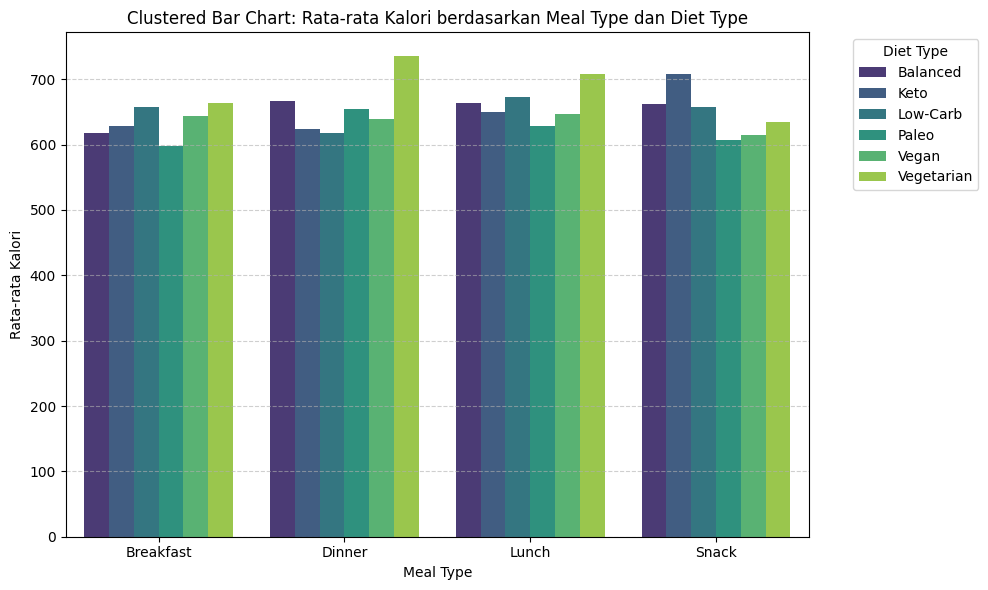

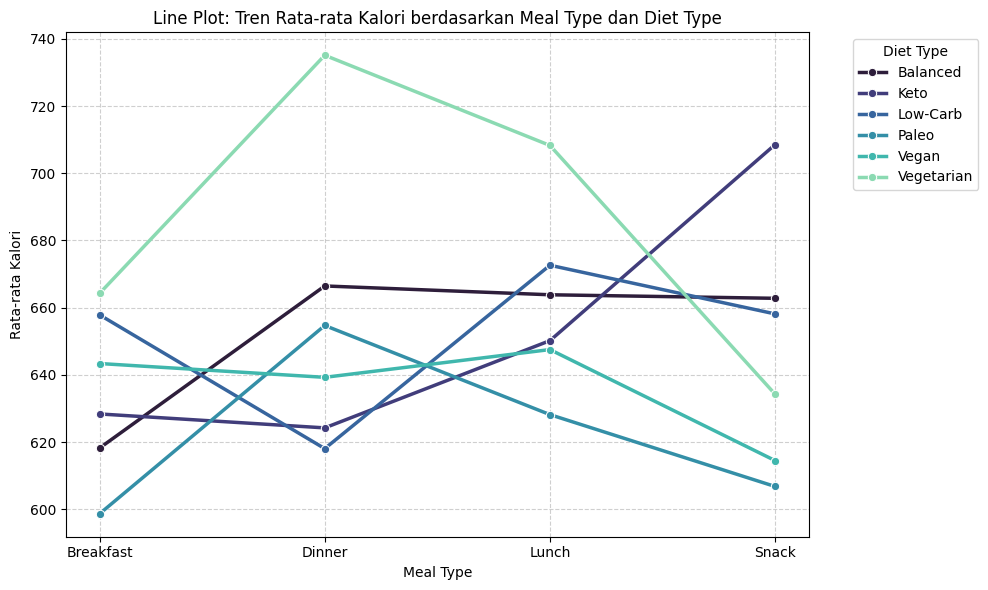

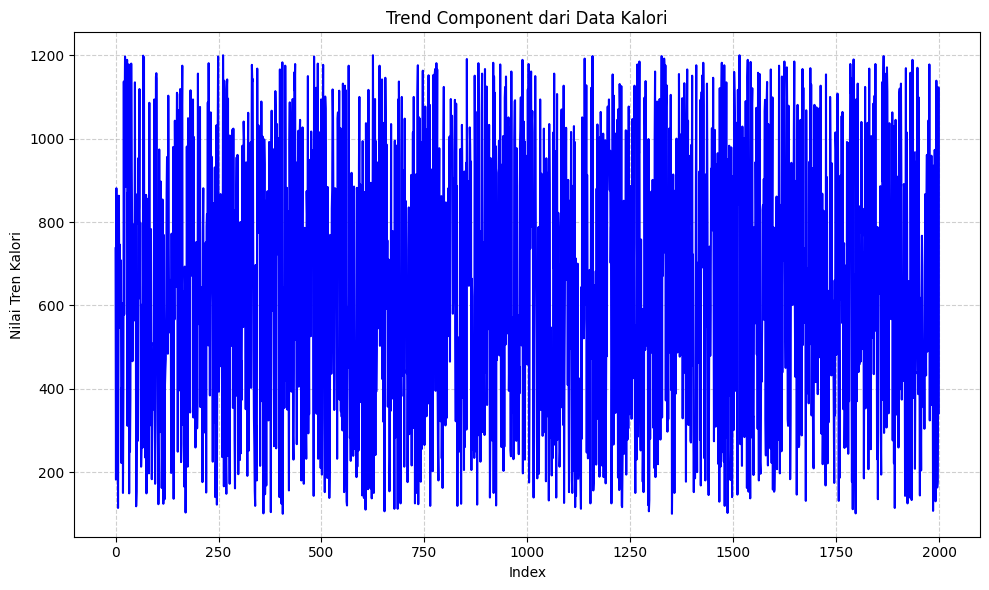

In [35]:
# ============================================
# FEATURE ENGINEERING & MULTIPLE VISUALIZATIONS
# (Clustered Bar, Line Plot, Trend Component)
# ============================================

# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# --------------------------------------------
# 1️⃣ Import Dataset dari Google Sheet
# --------------------------------------------
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT16cUck_7OiG3B4aHsgL41RYMeXbXrKEebYzyFz5oGRx1aXS1vnK3jymQ998AnTHdMr5TH9Lnzlkvg/pub?output=csv"
df = pd.read_csv(sheet_url)

print("Data awal:")
print(df.head(), "\n")

# --------------------------------------------
# 2️⃣ Feature Engineering: Gabungkan meal_type + diet_type
# --------------------------------------------
df['meal_diet_combo'] = df['meal_type'] + " - " + df['diet_type']

# --------------------------------------------
# 3️⃣ Hitung rata-rata kalori per kombinasi meal_type dan diet_type
# --------------------------------------------
avg_calories = df.groupby(['meal_type', 'diet_type'])['calories'].mean().reset_index()

print("Rata-rata kalori berdasarkan meal_type dan diet_type:")
print(avg_calories, "\n")

# --------------------------------------------
# 4️⃣ Clustered Bar Chart
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_calories,
    x='meal_type',
    y='calories',
    hue='diet_type',
    palette='viridis'
)
plt.title('Clustered Bar Chart: Rata-rata Kalori berdasarkan Meal Type dan Diet Type')
plt.xlabel('Meal Type')
plt.ylabel('Rata-rata Kalori')
plt.legend(title='Diet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 5️⃣ 2D Line Plot
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_calories,
    x='meal_type',
    y='calories',
    hue='diet_type',
    marker='o',
    linewidth=2.5,
    palette='mako'
)
plt.title('Line Plot: Tren Rata-rata Kalori berdasarkan Meal Type dan Diet Type')
plt.xlabel('Meal Type')
plt.ylabel('Rata-rata Kalori')
plt.legend(title='Diet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 6️⃣ Trend Component dari Time Series Kalori
# --------------------------------------------
# Untuk simulasi tren, kita urutkan data berdasarkan indeks dan gunakan kolom 'calories'
# (Jika data kamu punya kolom waktu, bisa pakai sebagai 'period' untuk hasil lebih akurat)
df_sorted = df.sort_index()

# Karena seasonal_decompose butuh data berseri waktu, kita gunakan nilai numerik saja
result = seasonal_decompose(df_sorted['calories'], model='additive', period=1)

plt.figure(figsize=(10, 6))
plt.plot(result.trend, color='blue')
plt.title('Trend Component dari Data Kalori')
plt.xlabel('Index')
plt.ylabel('Nilai Tren Kalori')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Dengan menjalankan script ini, Anda akan melihat visualisasi pola dan tren dari data yang ada dalam data.csv. Pastikan untuk menginstal library yang diperlukan seperti Pandas, Matplotlib, dan statsmodels jika belum terinstal di lingkungan Python Anda (pip install pandas matplotlib statsmodels).

#### Contoh Kasus NLP: Analisis Sentimen Sederhana
Kita akan membuat sebuah contoh kasus di mana kita akan melakukan analisis sentimen terhadap ulasan film. Kita akan menggunakan dataset yang sudah disediakan oleh NLTK dan menghitung nilai positif atau negatif dari setiap ulasan.

In [ ]:
!pip install nltk

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the cell above and authorizing Google Drive access, you can read your CSV file. Replace the placeholder path with the actual path to your file in Google Drive.

In [26]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
try:
    data = pd.read_csv('/content/drive/My Drive/path/to/your/file.csv', parse_dates=['date'], index_col='date')
    print("Data loaded successfully:")
    print(data.head())
except FileNotFoundError:
    print("Error: Make sure the file path is correct and Google Drive is mounted.")
except KeyError:
    print("Error: Make sure the DataFrame contains a 'date' column.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Make sure the file path is correct and Google Drive is mounted.
